# Image tiling

To parallelize SourceXtractor++ on different machines, one option is to slice the images in smaller tiles. This notebook allows to create such tiles, with overlaps and customizable size.

In [3]:
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
import dja_sepp

In [4]:
home = "/home/aurelien/DAWN/DJA-SEpp"
field = 'GDS'
filter = 'f200w'

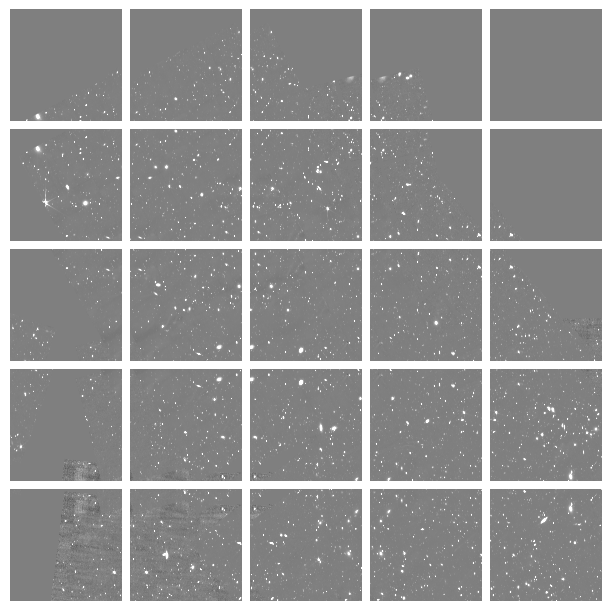

In [5]:
# filename = ""
filename = glob.glob(f"{home}/fields/{field}/image/*{filter}*sci*.fits")[0]

hdu = fits.open(filename, memmap=True)[0]
wcs = WCS(hdu.header)
data = hdu.data

max_size = 2.0*u.arcmin
overlap = 0.5*u.arcmin
nx, ny = dja_sepp.tiles.tile_grid(wcs, max_size, max_size, overlap)
centers, sizes = dja_sepp.tiles.tile_positions(wcs, nx, ny, overlap)
tiles = dja_sepp.tiles.create_tiles(data, wcs, centers, sizes)

dja_sepp.tiles.plot_tiles(nx, ny, tiles, plot_main=False)
plt.show()

## Batch tiling

The following part is about creating and saving tiles for multi-band images.

Number of images found : 34
Images found :
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f090w-clear_drc_sci_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f090w-clear_drc_wht_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f115w-clear_drc_sci_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f115w-clear_drc_wht_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f150w-clear_drc_sci_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f150w-clear_drc_wht_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f182m-clear_drc_sci_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f182m-clear_drc_wht_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f200w-clear_drc_sci_cutout.fits
/home/ec2-user/DAWN/DJA-SEpp/image/GDS/cutout/gds-grizli-v7.2-f200w-clear_drc_wht_cutout.fits
/home/ec2-user/DA

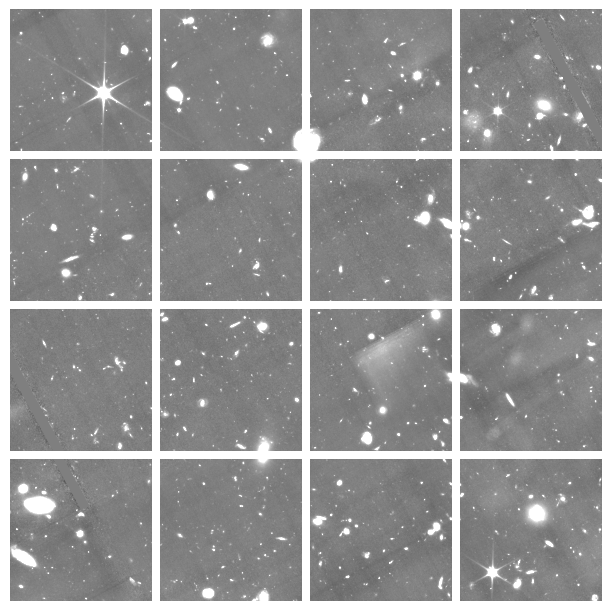

In [9]:
dja_sepp.tiles.batch_tiling(generic_filename=f"{home}/fields/{field}/image/*.fits",
                            tile_max_size=0.5*u.arcmin, overlap=0.0*u.arcmin,
                            plot=True, verbose=True)